In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("./Crime_Data_from_2010_to_Present.csv")

In [3]:
data.columns

Index(['DR Number', 'Date Reported', 'Date Occurred', 'Time Occurred',
       'Area ID', 'Area Name', 'Reporting District', 'Crime Code',
       'Crime Code Description', 'MO Codes', 'Victim Age', 'Victim Sex',
       'Victim Descent', 'Premise Code', 'Premise Description',
       'Weapon Used Code', 'Weapon Description', 'Status Code',
       'Status Description', 'Crime Code 1', 'Crime Code 2', 'Crime Code 3',
       'Crime Code 4', 'Address', 'Cross Street', 'Location '],
      dtype='object')

In [154]:
sns.set()
sns.set_style("dark")

In [5]:
crime_code_discription_dict = dict(zip(data["Crime Code"].value_counts()[0:10].index, data["Crime Code Description"].value_counts()[0:10].index))
crime_code_discription_dict

{230: 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
 310: 'BURGLARY',
 330: 'BURGLARY FROM VEHICLE',
 354: 'THEFT OF IDENTITY',
 440: 'THEFT PLAIN - PETTY ($950 & UNDER)',
 510: 'VEHICLE - STOLEN',
 624: 'BATTERY - SIMPLE ASSAULT',
 626: 'INTIMATE PARTNER - SIMPLE ASSAULT',
 740: 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114',
 745: 'VANDALISM - MISDEAMEANOR ($399 OR UNDER)'}

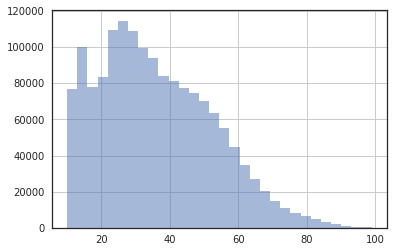

In [135]:
data['Victim Age'].hist(bins = 30,alpha = 0.5)


In [159]:
data['Victim Age'].value_counts() # it shows that victim age has a peak during 15 and 16

16.0    42535
25.0    39227
15.0    38776
24.0    38238
26.0    37981
27.0    37492
23.0    37061
28.0    36749
29.0    36543
30.0    35915
22.0    34382
31.0    33837
14.0    33263
32.0    33261
35.0    32462
33.0    32292
34.0    31950
21.0    31697
36.0    29880
40.0    28518
37.0    28467
20.0    28282
13.0    28202
38.0    27767
39.0    27605
42.0    26328
41.0    26318
43.0    26146
12.0    26015
11.0    26004
        ...  
70.0     5535
71.0     4749
72.0     4466
73.0     3870
74.0     3519
75.0     3476
76.0     2951
77.0     2766
78.0     2529
79.0     2319
80.0     2225
81.0     1865
82.0     1740
83.0     1594
84.0     1471
85.0     1275
86.0     1135
87.0      978
88.0      912
89.0      730
90.0      666
91.0      507
92.0      402
99.0      377
93.0      356
94.0      287
95.0      196
96.0      143
97.0      107
98.0       75
Name: Victim Age, Length: 90, dtype: int64

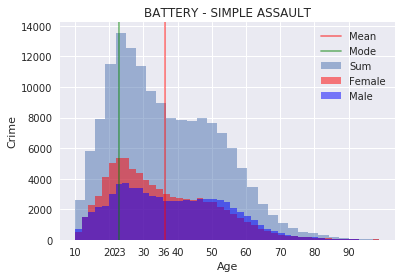

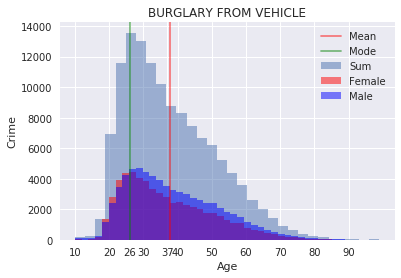

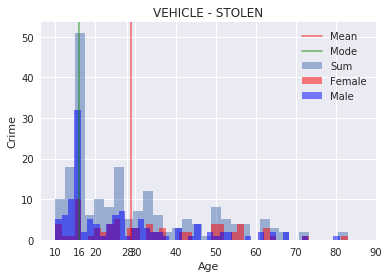

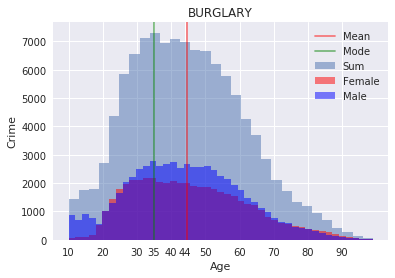

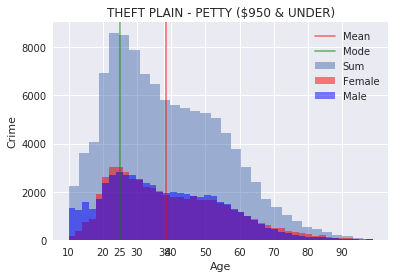

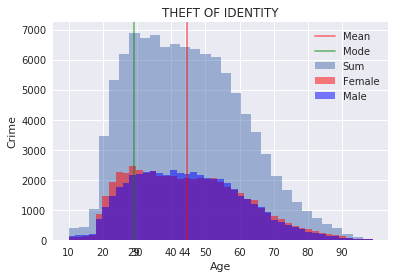

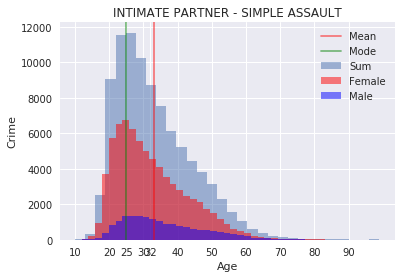

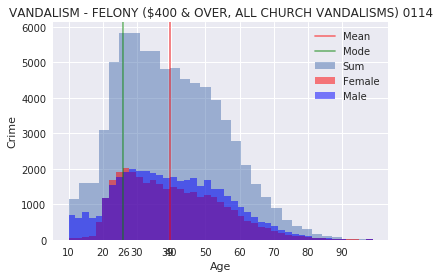

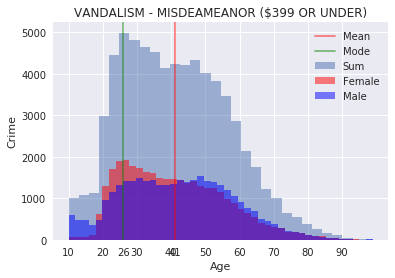

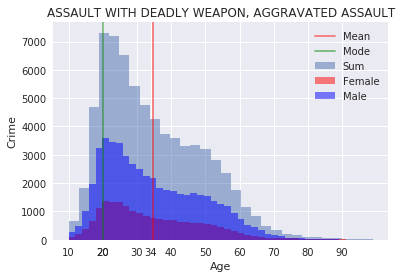

In [158]:
Victim_age_crime_sex = data[['Victim Age','Crime Code','Victim Sex']].dropna()
top10_crime = data["Crime Code"].value_counts()[:10].index
counter = 1
for crime_code in top10_crime[:]:
    plt.figure()
    data_wrt_crime = Victim_age_crime_sex[Victim_age_crime_sex['Crime Code'] == crime_code]
#     data_wrt_crime['Victim Age'].hist(bins = 45,alpha=0.5)
    sum_data = data_wrt_crime['Victim Age']
    female_data = data_wrt_crime[data_wrt_crime['Victim Sex'] == 'F']['Victim Age']
    male_data = data_wrt_crime[data_wrt_crime['Victim Sex'] == 'M']['Victim Age']
    crime_mean = Victim_age_crime_sex[Victim_age_crime_sex['Crime Code'] == crime_code]['Victim Age'].mean() 
#     crime_median = Victim_age_crime_sex[Victim_age_crime_sex['Crime Code'] == crime_code]['Victim Age'].median() 
    crime_mode = Victim_age_crime_sex[Victim_age_crime_sex['Crime Code'] == crime_code]['Victim Age'].mode().data[0]
    
    #plot
#     sns.distplot(sum_data,kde=False,bins=30)
#     sns.distplot(female_data,kde=False,bins=30
#     sns.distplot(male_data,kde=False,bins=30, boxprops=dict(alpha=.3))
    plt.hist(sum_data,bins = 30, alpha =0.5,label="Sum")
    plt.hist(female_data,bins = 45,alpha=0.5,color = 'r',label='Female')
    plt.hist(male_data,bins = 45,alpha=0.5,color = 'b',label='Male')
    plt.axvline(x = crime_mean,color = 'r',label='mean',alpha = 0.5)
#     plt.axvline(x = crime_median,color ='y',label='median',alpha = 0.5)
    plt.axvline(x = crime_mode,color ='g',label='Mode',alpha = 0.5)
    plt.title(crime_code_discription_dict[crime_code])
    plt.xlabel('Age')
    plt.ylabel('Crime')
    plt.legend(["Mean","Mode","Sum","Female","Male"])
    plt.xticks([10,20,30,40,50,60,70,80,90,int(crime_mean),int(crime_mode)])
    plt.grid()
    



In [9]:
data.columns

Index(['DR Number', 'Date Reported', 'Date Occurred', 'Time Occurred',
       'Area ID', 'Area Name', 'Reporting District', 'Crime Code',
       'Crime Code Description', 'MO Codes', 'Victim Age', 'Victim Sex',
       'Victim Descent', 'Premise Code', 'Premise Description',
       'Weapon Used Code', 'Weapon Description', 'Status Code',
       'Status Description', 'Crime Code 1', 'Crime Code 2', 'Crime Code 3',
       'Crime Code 4', 'Address', 'Cross Street', 'Location '],
      dtype='object')

In [93]:
area_crime_code = data[['Area ID','Crime Code Description']].dropna()[:]

#find top 10 crime 

for crime_code in crime_code_discription_dict:
    crime_code_discription_dict[cri]

# heatmap = area_crime_code.groupby(['Area ID',"Crime Code Description"])
# plt.pcolor(heatmap)

In [129]:
group_area_crime = area_crime_code.groupby(['Area ID','Crime Code Description']).groups
stat_area_crime ={
    'Area ID':[],
    'Crime Code Description':[],
    'Value':[]
}
for item in group_area_crime:
    if item[1] in crime_code_discription_dict.values():
        stat_area_crime['Area ID'].append(item[0])
        stat_area_crime['Crime Code Description'].append(item[1])
        stat_area_crime['Value'].append(len(group_area_crime[item]))

stat_area_crime = pd.DataFrame(stat_area_crime)
# stat_area_crime
    




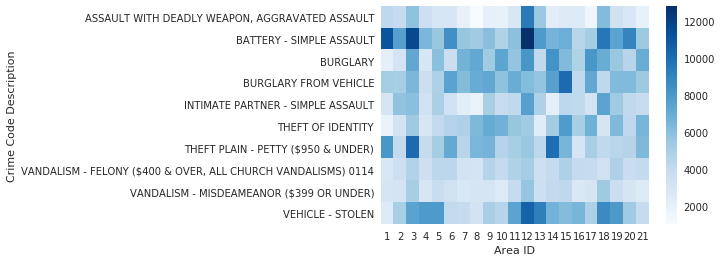

In [132]:
sns.heatmap(stat_area_crime.pivot('Crime Code Description','Area ID','Value'),cmap="Blues")